# Análise de dados populacionais com o pandas

## Importação do pacote pandas e o do arquivo .csv

In [42]:
# importação do pacote pandas
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt

In [43]:
# Lendo o arquivo csv e guardadno os dados em um dataframe
df = pd.read_csv("Gapminder.csv",error_bad_lines=False, sep=";")

In [44]:
# Verificando as 5 primeiras linhas do dataframe
df.head()

,country,continent,year,lifeExp,pop,gdpPercap
0,Afghanistan,Asia,1952,28.801,8425333,779.445314
1,Afghanistan,Asia,1957,30.332,9240934,820.853030
2,Afghanistan,Asia,1962,31.997,10267083,853.100710
3,Afghanistan,Asia,1967,34.020,11537966,836.197138
4,Afghanistan,Asia,1972,36.088,13079460,739.981106


## Interações básicas com o Dataframe

In [45]:
# Renomeando os nomes das coolunas
df = df.rename(columns={"country":"Pais", "continent": "continente", "year":"Ano", "lifeExp":"Expectativa de vida", "pop":"Pop Total", "gdpPercap": "PIB"})

In [46]:
df.head()

,Pais,continente,Ano,Expectativa de vida,Pop Total,PIB
0,Afghanistan,Asia,1952,28.801,8425333,779.445314
1,Afghanistan,Asia,1957,30.332,9240934,820.853030
2,Afghanistan,Asia,1962,31.997,10267083,853.100710
3,Afghanistan,Asia,1967,34.020,11537966,836.197138
4,Afghanistan,Asia,1972,36.088,13079460,739.981106


In [47]:
# Verificando o Tamanho do DataFrame (linhas x Clounas)
df.shape

(3312, 6)

In [48]:
# Verificando o tipo de dados em cada coluna
df.dtypes

Pais                    object
continente              object
Ano                      int64
Expectativa de vida    float64
Pop Total                int64
PIB                    float64
dtype: object

In [49]:
# Obtendo os nomes das colunas
df.columns

Index(['Pais', 'continente', 'Ano', 'Expectativa de vida', 'Pop Total', 'PIB'], dtype='object')

In [50]:
# Estatisticas de dados de colunas numéricas
df.describe()

,Ano,Expectativa de vida,Pop Total,PIB
count,3312.000000,3312.000000,3.312000e+03,3312.000000
mean,1980.301630,65.246871,3.161489e+07,11317.115805
std,16.927294,11.768412,1.041193e+08,11369.142739
min,1950.000000,23.599000,5.941200e+04,241.165877
25%,1967.000000,58.337500,2.678572e+06,2514.625266
50%,1982.000000,69.610000,7.557218e+06,7838.505123
75%,1996.000000,73.657750,1.958522e+07,17357.879170
max,2007.000000,82.670000,1.318683e+09,113523.132900


In [51]:
# Filtrndo valores com base em linhas e colunas
df["continente"].unique() 

array(['Asia', 'Europe', 'Africa', 'Americas', nan, 'FSU', 'Oceania'],
      dtype=object)

In [52]:
# Filtrando (buscando/localizando) dados relacionaods ao continete oceania
Oceania = df.loc[df["continente"] == "Oceania"]
Oceania.head()

,Pais,continente,Ano,Expectativa de vida,Pop Total,PIB
975,Fiji,Oceania,1962,56.494,421869,2039.393277
976,Fiji,Oceania,1967,58.607,485000,2170.073285
977,Fiji,Oceania,1972,60.642,544000,2797.759484
978,Fiji,Oceania,1977,62.669,599339,3182.569600
979,Fiji,Oceania,1982,64.683,658906,3209.257468


   ## Agrupando dados para análise

In [53]:
# Agrupanpod dados para obter a quantidade de poaises por continente
df.groupby("continente")["Pais"].nunique()

continente
Africa      51
Americas    25
Asia        41
Europe      35
FSU          6
Oceania      3
Name: Pais, dtype: int64

In [54]:
# Agrupando dados de expectativa de vida média para cada ano
df.groupby("Ano")["Expectativa de vida"].mean()

Ano
1950    62.002568
1951    65.904167
1952    49.206867
1953    66.674563
1954    67.459817
1955    67.806757
1956    67.950637
1957    51.614590
1958    68.815936
1959    68.226579
1960    68.470837
1961    68.862480
1962    54.035234
1963    69.595735
1964    70.063105
1965    70.259881
1966    70.447526
1967    56.263629
1968    70.689081
1969    70.653896
1970    70.961141
1971    71.103976
1972    58.474481
1973    71.500338
1974    71.778504
1975    71.939218
1976    72.158050
1977    60.429090
1978    72.717567
1979    73.018717
1980    73.064524
1981    73.337399
1982    62.365871
1983    73.787778
1984    74.100741
1985    74.112222
1986    74.452222
1987    63.984860
1988    74.760000
1989    74.924444
1990    74.283437
1991    74.374848
1992    65.008443
1993    74.324545
1994    74.456667
1995    74.552727
1996    75.029394
1997    65.873799
1998    75.569697
1999    75.703636
2000    76.026364
2001    76.257879
2002    66.835695
2003    76.586667
2004    76.921563
2005  

## Novas interações

### Dados de expectativa de vida

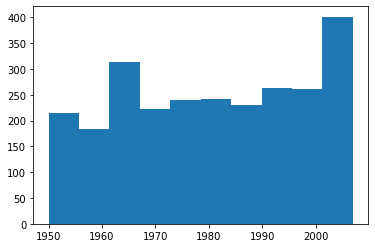

In [55]:
# Histograma com valores médios ao longo dos anos
plt.hist(df.groupby(df["Expectativa de vida"])["Ano"].mean());

In [56]:
# Expectativa de vida média por continente
df.groupby("continente")["Expectativa de vida"].mean()

continente
Africa      48.518682
Americas    65.789711
Asia        62.242752
Europe      72.721644
FSU         68.800279
Oceania     70.396622
Name: Expectativa de vida, dtype: float64

In [57]:
# Expectativa de vida maxoma por continente
df.groupby("continente")["Expectativa de vida"].max()

continente
Africa      73.952
Americas    78.782
Asia        82.670
Europe      81.757
FSU         72.962
Oceania     80.204
Name: Expectativa de vida, dtype: float64

In [58]:
# Expectativa de vida minima por continente
df.groupby("continente")["Expectativa de vida"].min()

continente
Africa      23.599
Americas    40.414
Asia        28.801
Europe      43.585
FSU         57.300
Oceania     52.964
Name: Expectativa de vida, dtype: float64

### Dados relacionados ao PIB

In [59]:
# PIB médio por continente
df.groupby("continente")["PIB"].mean()

continente
Africa       2138.088351
Americas     8979.564475
Asia        10070.908182
Europe      16551.177664
FSU          7903.069822
Oceania     13078.961304
Name: PIB, dtype: float64

In [60]:
# PIB máximo por continente
df.groupby("continente")["PIB"].max()

continente
Africa       21951.21176
Americas     42951.65309
Asia        113523.13290
Europe       70014.00000
FSU          16666.50874
Oceania      25185.00911
Name: PIB, dtype: float64

In [61]:
# PIB minimo por continente
df.groupby("continente")["PIB"].min()

continente
Africa       241.165877
Americas    1397.717137
Asia         331.000000
Europe       973.533195
FSU         3435.906978
Oceania      864.974253
Name: PIB, dtype: float64

### Calculo da correlação entre expectativa de vida e PIB

In [62]:
correlacao = df["PIB"].corr(df["Expectativa de vida"])
print(f'A correlação entre a exp. de vida e o Pib é igual a {correlacao:.2f}')

A correlação entre a exp. de vida e o Pib é igual a 0.63
